# Prabal Ghosh Roll-AM.SC.P2CSC20040 Assignment-4 (Machine learning)-Ridge_Regression

In [12]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV,Lasso, LassoCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15,random_state=5)
print(x[:5])
print(y[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


In [14]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
     model = Ridge(alpha=a, normalize=True).fit(x,y) 
     score1 = model.score(x, y)
     pred_y = model.predict(x)
     mse1 = mean_squared_error(y, pred_y) 
     print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score1, mse1, np.sqrt(mse1)))

Alpha:0.000001, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000010, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000100, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.001000, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.010000, R2:0.740, MSE:21.92, RMSE:4.68
Alpha:0.100000, R2:0.732, MSE:22.66, RMSE:4.76
Alpha:0.500000, R2:0.686, MSE:26.48, RMSE:5.15
Alpha:1.000000, R2:0.635, MSE:30.81, RMSE:5.55


In [15]:
ridge_mod=Ridge(alpha=0, normalize=True).fit(xtrain,ytrain)
ypred = ridge_mod.predict(xtest)
score = model.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

R2:0.708, MSE:21.97, RMSE:4.69


In [16]:
ridge_mod=Ridge(alpha=0.1, normalize=True).fit(xtrain,ytrain)
print(ridge_mod.coef_)
ypred = ridge_mod.predict(xtest)
score = model.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

[-9.98280011e-02  2.90131915e-02 -5.42428303e-02  3.16760873e+00
 -9.33761834e+00  3.95757186e+00 -4.92355047e-03 -1.02814612e+00
  1.42835909e-01 -4.64957048e-03 -7.93976266e-01  1.12368155e-02
 -5.11831118e-01]
R2:0.708, MSE:20.58, RMSE:4.54


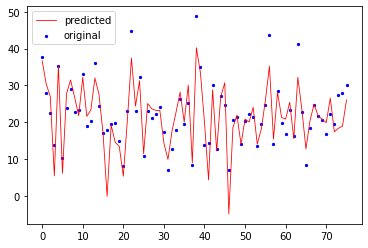

In [17]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=.8, color="red", label="predicted")
plt.legend()
plt.show()

In [18]:
ridge_cv1=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod1 = ridge_cv1.fit(xtrain,ytrain)
print(ridge_mod1.alpha_)


0.1


In [19]:
ypred = ridge_mod1.predict(xtest)
score = ridge_mod1.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

R2:0.702, MSE:22.12, RMSE:4.70


In [20]:
lasso1=Lasso(alpha=0.01, normalize=True)
lasso_1 = lasso1.fit(xtrain,ytrain)
print(lasso_1.coef_)



[-0.05556583  0.01487832 -0.01103095  2.63039589 -6.73439396  4.0825522
 -0.         -0.78474758  0.01397373 -0.         -0.77189066  0.00973547
 -0.58682954]


In [21]:
elastic1=ElasticNet(alpha=0.01, normalize=True)
elastic_1 = elastic1.fit(xtrain,ytrain)
print(elastic_1.coef_)


[-5.26280902e-02  1.53057678e-02 -6.38061739e-02  1.62166225e+00
 -3.08327562e+00  1.99845278e+00 -9.38792401e-03 -5.03800839e-02
 -2.09721066e-02 -2.37416922e-03 -3.75802860e-01  4.99256816e-03
 -1.95098724e-01]
